# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi grafik
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow

from sklearn.cluster import KMeans, DBSCAN  # Mengimpor algoritma KMeans dan DBSCAN untuk clustering
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
music_data = pd.read_csv("/content/cleaned_dataset.csv")
music_data.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,-6.679,0.1770,0.008360,0.002330,...,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09,1.150082,Spotify
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,-5.815,0.0302,0.086900,0.000687,...,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08,15.183585,Spotify
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,-3.930,0.0522,0.042500,0.046900,...,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,True,True,6.306347e+07,7.956897,Spotify
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,-5.810,0.0260,0.000015,0.509000,...,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,True,True,4.346636e+08,11.546875,Spotify
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,-8.627,0.1710,0.025300,0.000000,...,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,True,True,6.172597e+08,9.942693,Youtube


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

**Memahami Struktur Data**

In [ ]:
music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20594 entries, 0 to 20593
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20594 non-null  object 
 1   Track             20594 non-null  object 
 2   Album             20594 non-null  object 
 3   Album_type        20594 non-null  object 
 4   Danceability      20594 non-null  float64
 5   Energy            20594 non-null  float64
 6   Loudness          20594 non-null  float64
 7   Speechiness       20594 non-null  float64
 8   Acousticness      20594 non-null  float64
 9   Instrumentalness  20594 non-null  float64
 10  Liveness          20594 non-null  float64
 11  Valence           20594 non-null  float64
 12  Tempo             20594 non-null  float64
 13  Duration_min      20594 non-null  float64
 14  Title             20594 non-null  object 
 15  Channel           20594 non-null  object 
 16  Views             20594 non-null  float6

In [ ]:
music_data.describe()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_min,Views,Likes,Comments,Stream,EnergyLiveness
count,20594.000000,20594.000000,20594.000000,20594.000000,20594.000000,20594.000000,20594.000000,20594.000000,20594.000000,20594.000000,2.059400e+04,2.059400e+04,2.059400e+04,2.059400e+04,20592.000000
mean,0.620102,0.635176,-7.678254,0.096733,0.291391,0.056162,0.193653,0.530077,120.562616,3.742439,9.203740e+07,6.479902e+05,2.684679e+04,1.326446e+08,5.167227
std,0.165504,0.214274,4.639481,0.112182,0.286117,0.193622,0.168832,0.245542,29.588093,2.085211,2.726026e+08,1.773648e+06,1.911751e+05,2.423582e+08,4.117431
min,0.000000,0.000000,-46.251000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000049
25%,0.519000,0.507000,-8.868000,0.035700,0.045200,0.000000,0.094100,0.340000,96.994000,2.996746,1.478284e+06,1.754200e+04,4.060000e+02,1.559098e+07,2.386190
50%,0.638000,0.666000,-6.540500,0.050650,0.193000,0.000002,0.125000,0.538000,119.959000,3.551267,1.331348e+07,1.153155e+05,3.006000e+03,4.730525e+07,4.256881
75%,0.741000,0.798000,-4.935000,0.104000,0.476750,0.000474,0.237000,0.727000,139.923500,4.202163,6.739682e+07,5.000198e+05,1.373675e+04,1.343453e+08,6.822034
max,0.975000,1.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,77.934300,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09,59.113924


**Menangani Data yang Hilang**

In [ ]:
music_data.isnull().sum()

,0
Artist,0
Track,0
Album,0
Album_type,0
Danceability,0
Energy,0
Loudness,0
Speechiness,0
Acousticness,0
Instrumentalness,0


Value dengan nilai null hanya ada pada kolom 'EnergyLiveness' dengan jumlah sebanyak 2. Jumlah tersebut masih ada di bawah 10% dari keseluruhan dataset sehingga baris dengan nilai null pada tersebut akan dihapus

**Analisis Distribusi dan Korelasi**

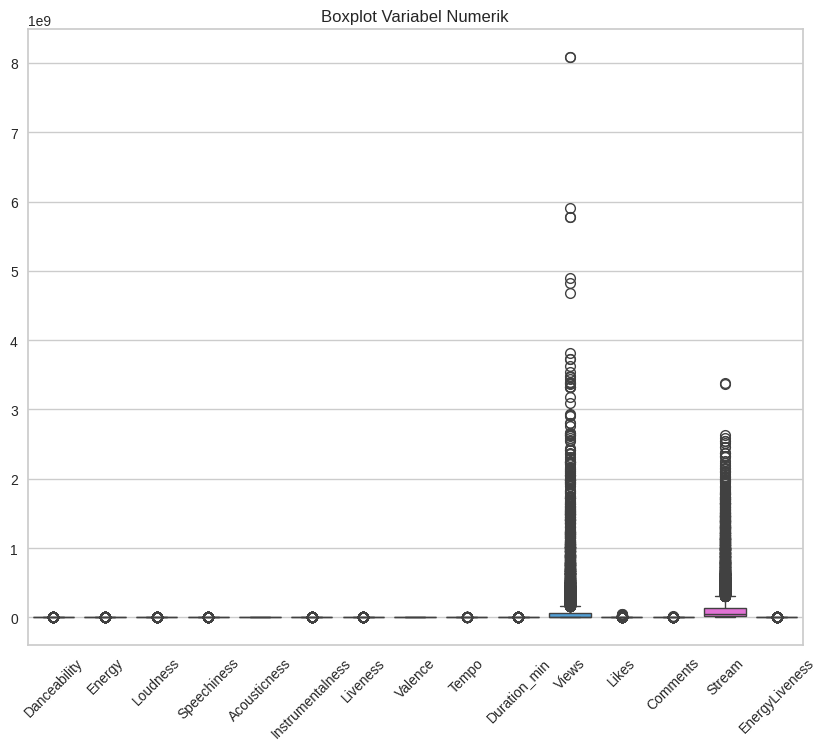

In [ ]:
import seaborn as sns

# Boxplot untuk semua variabel numerik
plt.figure(figsize=(10, 8))
sns.boxplot(data=music_data.select_dtypes(include=['int64', 'float64']))
plt.xticks(rotation=45)
plt.title('Boxplot Variabel Numerik')
plt.show()

Dari boxplot di atas, distribusi data numerik tidak seimbang untuk beberapa data, seperti duration_min dan stream. Ketidaseimbangan distribusi data dapat di atas dengan normalisasi pada pemrosesan data

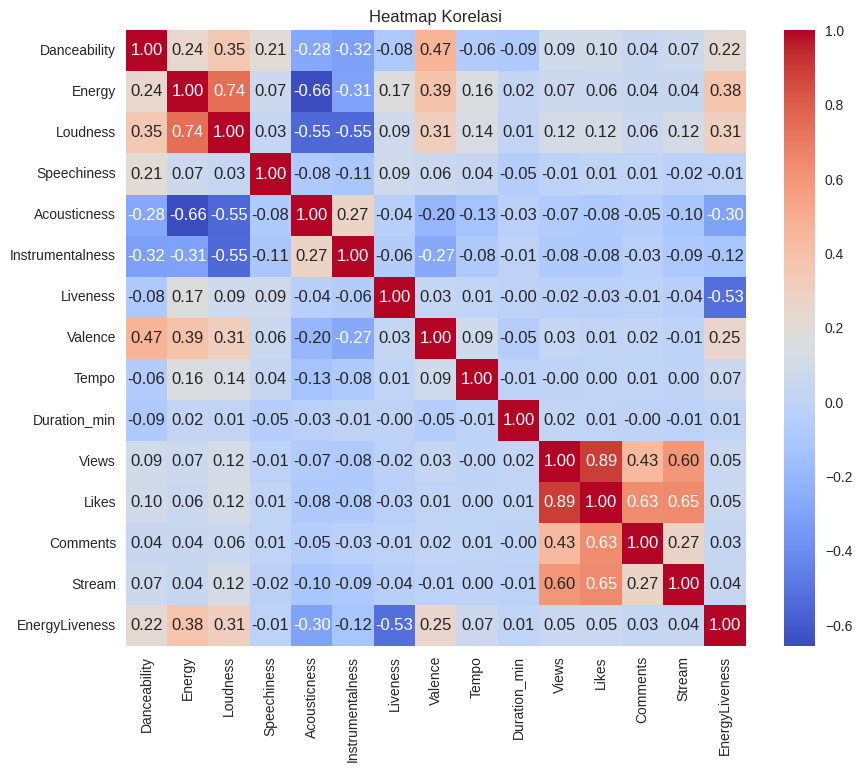

In [ ]:
# Memilih hanya kolom numerik
numeric_data = music_data.select_dtypes(include=['number'])

# Menghitung matriks korelasi
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi')
plt.show()

Pada proses persiapan data untuk analisis clustering, variabel likes dihapus karena memiliki korelasi yang sangat tinggi dengan variabel views (korelasi sebesar 0.89). Korelasi yang tinggi ini menunjukkan adanya redundansi informasi antara kedua variabel tersebut, sehingga menyertakan keduanya dapat menyebabkan bias dalam hasil clustering.

Variabel views dipertahankan karena dianggap lebih representatif dalam menggambarkan popularitas suatu video, mengingat jumlah penayangan mencakup semua interaksi pengguna, sedangkan likes hanya merupakan subset dari penayangan. Dengan demikian, penghapusan variabel likes bertujuan untuk mengurangi redundansi data dan meningkatkan efisiensi serta interpretabilitas model clustering.

**Visualisasi Data**

<ipython-input-93-26c5754a47c3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Album_type', data=music_data, palette='pastel')


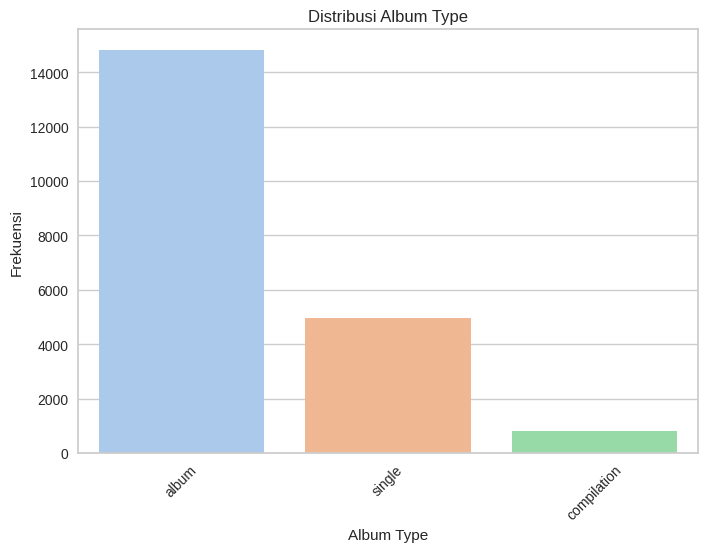

In [ ]:
# Diagram batang untuk variabel kategorikal, contoh: 'album_type'
sns.countplot(x='Album_type', data=music_data, palette='pastel')
plt.title('Distribusi Album Type')
plt.xlabel('Album Type')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

**Menghapus/Menangani Data Kosong**

In [ ]:
cleaned_music_data = music_data.dropna(subset=['EnergyLiveness'])

In [ ]:
num_duplicates = cleaned_music_data.duplicated().sum()
print(f"Jumlah data duplikat: {num_duplicates}")

Jumlah data duplikat: 0


**Normalisasi atau Standarisasi Fitur**

Drop kolom 'Likes' dan lakukan normalisasi data numerik dengan MixMaxScaler()

In [ ]:
cleaned_music_data = cleaned_music_data.drop(columns=['Likes'])

In [ ]:
cleaned_music_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20592 entries, 0 to 20593
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20592 non-null  object 
 1   Track             20592 non-null  object 
 2   Album             20592 non-null  object 
 3   Album_type        20592 non-null  object 
 4   Danceability      20592 non-null  float64
 5   Energy            20592 non-null  float64
 6   Loudness          20592 non-null  float64
 7   Speechiness       20592 non-null  float64
 8   Acousticness      20592 non-null  float64
 9   Instrumentalness  20592 non-null  float64
 10  Liveness          20592 non-null  float64
 11  Valence           20592 non-null  float64
 12  Tempo             20592 non-null  float64
 13  Duration_min      20592 non-null  float64
 14  Title             20592 non-null  object 
 15  Channel           20592 non-null  object 
 16  Views             20592 non-null  float64
 17

In [ ]:
numeric_data = cleaned_music_data.select_dtypes(include=['number'])

scaler = MinMaxScaler()
scaled_numeric_data = scaler.fit_transform(numeric_data)

scaled_numeric_data = pd.DataFrame(scaled_numeric_data, columns=numeric_data.columns)

In [ ]:
# Gabungkan data numerik yang sudah dinormalisasi dengan kolom lainnya
data_normalized = pd.concat([scaled_numeric_data, cleaned_music_data.drop(columns=numeric_data.columns)], axis=1)

data_normalized.head()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_min,...,EnergyLiveness,Artist,Track,Album,Album_type,Title,Channel,Licensed,official_video,most_playedon
0,0.838974,0.704994,0.838905,0.183610,0.008392,0.002330,0.607306,0.777442,0.569330,0.041260,...,0.019455,Gorillaz,Feel Good Inc.,Demon Days,album,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,True,True,Spotify
1,0.693333,0.702994,0.857222,0.031328,0.087248,0.000687,0.032268,0.858006,0.381149,0.036423,...,0.256852,Gorillaz,Rhinestone Eyes,Plastic Beach,album,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,True,True,Spotify
2,0.712821,0.922998,0.897183,0.054149,0.042670,0.046900,0.102993,0.554884,0.443823,0.039647,...,0.134602,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,True,True,Spotify
3,0.706667,0.738995,0.857328,0.026971,0.000014,0.509000,0.050228,0.582075,0.494810,0.043677,...,0.195332,Gorillaz,On Melancholy Hill,Plastic Beach,album,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,True,True,Spotify
4,0.680000,0.693994,0.797609,0.177386,0.025401,0.000000,0.056114,0.528701,0.690108,0.066723,...,0.168195,Gorillaz,Clint Eastwood,Gorillaz,album,Gorillaz - Clint Eastwood (Official Video),Gorillaz,True,True,Youtube


In [ ]:
from scipy import stats

# Memilih hanya kolom numerik
numeric_data = data_normalized.select_dtypes(include=['number'])

# Menghitung Z-Score untuk setiap kolom
z_scores = stats.zscore(numeric_data)

# Menentukan baris mana yang memiliki Z-Score lebih besar dari 3 atau kurang dari -3
outliers_zscore = (abs(z_scores) > 3)

# Menampilkan baris yang mengandung outlier
outliers = numeric_data[outliers_zscore.any(axis=1)]
print(outliers)

Empty DataFrame
Columns: [Danceability, Energy, Loudness, Speechiness, Acousticness, Instrumentalness, Liveness, Valence, Tempo, Duration_min, Views, Comments, Stream, EnergyLiveness]
Index: []


Setelah dilakukan perhitungan Z-Score untuk semua kolom numerik pada dataset, hasil deteksi menunjukkan bahwa tidak ada baris data yang dianggap sebagai outlier berdasarkan kriteria Z-Score > 3 atau < -3

**Encoding Data Kategorikal**

In [ ]:
# Menghitung jumlah tipe yang ada dalam kolom
unique_types = data_normalized['Album_type'].unique()  # Tipe yang unik
num_types = len(unique_types)         # Jumlah tipe unik

print(f"Jumlah tipe yang ada: {num_types}")
print(f"Tipe-tipe yang ada: {unique_types}")

Jumlah tipe yang ada: 4
Tipe-tipe yang ada: ['album' 'single' 'compilation' nan]


In [ ]:
# Mengisi NaN dengan string "Unknown"
data_normalized['Album_type'].fillna('Unknown', inplace=True)

<ipython-input-102-c84e016b4df2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_normalized['Album_type'].fillna('Unknown', inplace=True)


In [ ]:
# Memeriksa jumlah tipe yang ada di kolom 'Album_type' setelah penanganan
print("Jumlah tipe yang ada:", data_normalized['Album_type'].nunique())
print("Tipe-tipe yang ada:", data_normalized['Album_type'].unique())

Jumlah tipe yang ada: 4
Tipe-tipe yang ada: ['album' 'single' 'compilation' 'Unknown']


In [ ]:
# Menggunakan One-Hot Encoding dengan pd.get_dummies
data_normalized_encoded = pd.get_dummies(data_normalized, columns=['Album_type'])

print(data_normalized_encoded.head())

   Danceability    Energy  Loudness  Speechiness  Acousticness  \
0      0.838974  0.704994  0.838905     0.183610      0.008392   
1      0.693333  0.702994  0.857222     0.031328      0.087248   
2      0.712821  0.922998  0.897183     0.054149      0.042670   
3      0.706667  0.738995  0.857328     0.026971      0.000014   
4      0.680000  0.693994  0.797609     0.177386      0.025401   

   Instrumentalness  Liveness   Valence     Tempo  Duration_min  ...  \
0          0.002330  0.607306  0.777442  0.569330      0.041260  ...   
1          0.000687  0.032268  0.858006  0.381149      0.036423  ...   
2          0.046900  0.102993  0.554884  0.443823      0.039647  ...   
3          0.509000  0.050228  0.582075  0.494810      0.043677  ...   
4          0.000000  0.056114  0.528701  0.690108      0.066723  ...   

                                           Album  \
0                                     Demon Days   
1                                  Plastic Beach   
2  New Gold (f

In [ ]:
data_normalized_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20594 entries, 0 to 20593
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Danceability            20592 non-null  float64
 1   Energy                  20592 non-null  float64
 2   Loudness                20592 non-null  float64
 3   Speechiness             20592 non-null  float64
 4   Acousticness            20592 non-null  float64
 5   Instrumentalness        20592 non-null  float64
 6   Liveness                20592 non-null  float64
 7   Valence                 20592 non-null  float64
 8   Tempo                   20592 non-null  float64
 9   Duration_min            20592 non-null  float64
 10  Views                   20592 non-null  float64
 11  Comments                20592 non-null  float64
 12  Stream                  20592 non-null  float64
 13  EnergyLiveness          20592 non-null  float64
 14  Artist                  20592 non-null

In [ ]:
# Menghitung jumlah tipe yang ada dalam kolom
unique_types = data_normalized_encoded['most_playedon'].unique()  # Tipe yang unik
num_types = len(unique_types)         # Jumlah tipe unik

print(f"Jumlah tipe yang ada: {num_types}")
print(f"Tipe-tipe yang ada: {unique_types}")

Jumlah tipe yang ada: 3
Tipe-tipe yang ada: ['Spotify' 'Youtube' nan]


In [ ]:
# Mengisi NaN dengan string "Unknown"
data_normalized_encoded['most_playedon'].fillna('Unknown', inplace=True)

<ipython-input-107-c0a3ed786f23>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_normalized_encoded['most_playedon'].fillna('Unknown', inplace=True)


In [ ]:
# Menghitung jumlah tipe yang ada dalam kolom
unique_types = data_normalized_encoded['most_playedon'].unique()  # Tipe yang unik
num_types = len(unique_types)         # Jumlah tipe unik

print(f"Jumlah tipe yang ada: {num_types}")
print(f"Tipe-tipe yang ada: {unique_types}")

Jumlah tipe yang ada: 3
Tipe-tipe yang ada: ['Spotify' 'Youtube' 'Unknown']


In [ ]:
# Menggunakan One-Hot Encoding dengan pd.get_dummies
data_normalized_encoded = pd.get_dummies(data_normalized_encoded, columns=['most_playedon'])

print(data_normalized_encoded.head())

   Danceability    Energy  Loudness  Speechiness  Acousticness  \
0      0.838974  0.704994  0.838905     0.183610      0.008392   
1      0.693333  0.702994  0.857222     0.031328      0.087248   
2      0.712821  0.922998  0.897183     0.054149      0.042670   
3      0.706667  0.738995  0.857328     0.026971      0.000014   
4      0.680000  0.693994  0.797609     0.177386      0.025401   

   Instrumentalness  Liveness   Valence     Tempo  Duration_min  ...  \
0          0.002330  0.607306  0.777442  0.569330      0.041260  ...   
1          0.000687  0.032268  0.858006  0.381149      0.036423  ...   
2          0.046900  0.102993  0.554884  0.443823      0.039647  ...   
3          0.509000  0.050228  0.582075  0.494810      0.043677  ...   
4          0.000000  0.056114  0.528701  0.690108      0.066723  ...   

    Channel  Licensed  official_video  Album_type_Unknown Album_type_album  \
0  Gorillaz      True            True               False             True   
1  Gorillaz   

In [ ]:
# Menghapus kolom-kolom yang tidak relevan
final_data = data_normalized_encoded.drop(columns=['official_video','Artist', 'Track', 'Album', 'Title', 'Channel', 'Licensed'])

final_data.head()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_min,...,Comments,Stream,EnergyLiveness,Album_type_Unknown,Album_type_album,Album_type_compilation,Album_type_single,most_playedon_Spotify,most_playedon_Unknown,most_playedon_Youtube
0,0.838974,0.704994,0.838905,0.183610,0.008392,0.002330,0.607306,0.777442,0.569330,0.041260,...,0.010564,0.307169,0.019455,False,True,False,False,True,False,False
1,0.693333,0.702994,0.857222,0.031328,0.087248,0.000687,0.032268,0.858006,0.381149,0.036423,...,0.001928,0.091564,0.256852,False,True,False,False,True,False,False
2,0.712821,0.922998,0.897183,0.054149,0.042670,0.046900,0.102993,0.554884,0.443823,0.039647,...,0.000460,0.018622,0.134602,False,False,False,True,True,False,False
3,0.706667,0.738995,0.857328,0.026971,0.000014,0.509000,0.050228,0.582075,0.494810,0.043677,...,0.003434,0.128351,0.195332,False,True,False,False,True,False,False
4,0.680000,0.693994,0.797609,0.177386,0.025401,0.000000,0.056114,0.528701,0.690108,0.066723,...,0.009695,0.182270,0.168195,False,True,False,False,False,False,True


In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20594 entries, 0 to 20593
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Danceability            20592 non-null  float64
 1   Energy                  20592 non-null  float64
 2   Loudness                20592 non-null  float64
 3   Speechiness             20592 non-null  float64
 4   Acousticness            20592 non-null  float64
 5   Instrumentalness        20592 non-null  float64
 6   Liveness                20592 non-null  float64
 7   Valence                 20592 non-null  float64
 8   Tempo                   20592 non-null  float64
 9   Duration_min            20592 non-null  float64
 10  Views                   20592 non-null  float64
 11  Comments                20592 non-null  float64
 12  Stream                  20592 non-null  float64
 13  EnergyLiveness          20592 non-null  float64
 14  Album_type_Unknown      20594 non-null

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

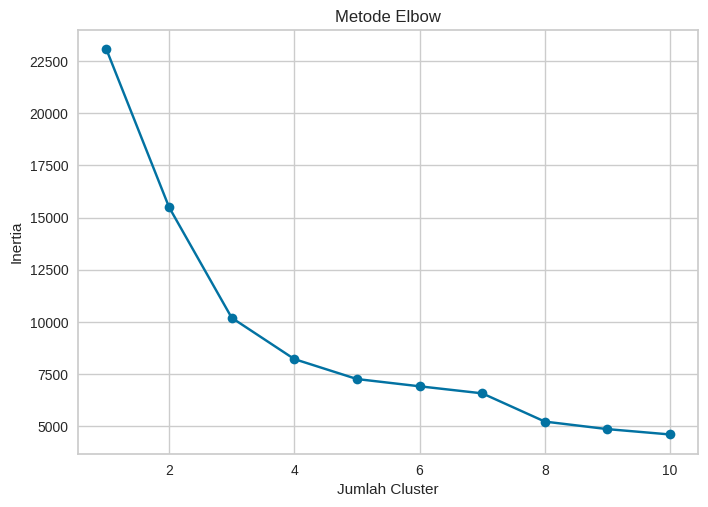

In [ ]:
# Elbom Method untuk menentukan jumlah cluster

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Replace 'mean' with other strategies if needed
final_data_imputed = imputer.fit_transform(final_data)

# Convert the imputed data back to a DataFrame
final_data = pd.DataFrame(final_data_imputed, columns=final_data.columns)

# Menentukan jumlah cluster yang berbeda
inertia_values = []

# Uji K-Means dengan jumlah cluster dari 1 hingga 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(final_data)  # Gunakan data yang sudah dinormalisasi
    inertia_values.append(kmeans.inertia_)

# Plotkan grafik Inertia vs Jumlah Cluster
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Metode Elbow')
plt.show()

Nilai cluster yang akan digunakan adalah 3

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20594 entries, 0 to 20593
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Danceability            20594 non-null  float64
 1   Energy                  20594 non-null  float64
 2   Loudness                20594 non-null  float64
 3   Speechiness             20594 non-null  float64
 4   Acousticness            20594 non-null  float64
 5   Instrumentalness        20594 non-null  float64
 6   Liveness                20594 non-null  float64
 7   Valence                 20594 non-null  float64
 8   Tempo                   20594 non-null  float64
 9   Duration_min            20594 non-null  float64
 10  Views                   20594 non-null  float64
 11  Comments                20594 non-null  float64
 12  Stream                  20594 non-null  float64
 13  EnergyLiveness          20594 non-null  float64
 14  Album_type_Unknown      20594 non-null

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)

# Melatih model dengan data numerik
# Pastikan Anda menggunakan data yang telah dinormalisasi
kmeans.fit(final_data)

KMeans(n_clusters=3, random_state=42)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
# Menghitung Silhouette Score untuk model clustering
score = silhouette_score(final_data, kmeans.labels_)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.45696572671912233


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20594 entries, 0 to 20593
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Danceability            20594 non-null  float64
 1   Energy                  20594 non-null  float64
 2   Loudness                20594 non-null  float64
 3   Speechiness             20594 non-null  float64
 4   Acousticness            20594 non-null  float64
 5   Instrumentalness        20594 non-null  float64
 6   Liveness                20594 non-null  float64
 7   Valence                 20594 non-null  float64
 8   Tempo                   20594 non-null  float64
 9   Duration_min            20594 non-null  float64
 10  Views                   20594 non-null  float64
 11  Comments                20594 non-null  float64
 12  Stream                  20594 non-null  float64
 13  EnergyLiveness          20594 non-null  float64
 14  Album_type_Unknown      20594 non-null

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Menghapus fitur dengan varians rendah
selector = VarianceThreshold(threshold=0.1)  # Threshold varians, sesuaikan jika diperlukan
data_selected = selector.fit_transform(final_data)

In [ ]:
print(data_selected)

[[1. 0. 1. 0.]
 [1. 0. 1. 0.]
 [0. 1. 1. 0.]
 ...
 [0. 1. 1. 0.]
 [0. 1. 1. 0.]
 [0. 1. 1. 0.]]


In [ ]:
# Memilih fitur yang terpilih setelah seleksi varians rendah
selected_columns = final_data.columns[selector.get_support()]

# Menampilkan nama-nama fitur yang terpilih
print("Fitur yang terpilih setelah seleksi varians rendah:")
print(selected_columns)

Fitur yang terpilih setelah seleksi varians rendah:
Index(['Album_type_album', 'Album_type_single', 'most_playedon_Spotify',
       'most_playedon_Youtube'],
      dtype='object')


In [ ]:
# Latih model dengan data setelah feature selection
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_selected)

# Evaluasi model dengan Silhouette Score
from sklearn.metrics import silhouette_score
score = silhouette_score(data_selected, kmeans.labels_)
print(f'Silhouette Score setelah Feature Selection: {score}')

Silhouette Score setelah Feature Selection: 0.8433096876128037


Meskipun memiliki nilai Silhouette tinggi, fitur yang dipilih tidak sesuai dengan kebutuhan karena keempat fitur memiliki tipe kategori

**Pemilihan fitur manual**

In [ ]:
# Menentukan kolom yang ingin digunakan
selected_columns = [
    'Danceability','Views','Energy','Loudness', 'Album_type_Unknown',
    'Album_type_album', 'Album_type_compilation', 'Album_type_single'
]

# Memilih data sesuai kolom yang dipilih
data_selected_manual = final_data[selected_columns]

# Menampilkan beberapa baris pertama dari data yang sudah dipilih
print(data_selected_manual.head())

   Danceability     Views    Energy  Loudness  Album_type_Unknown  \
0      0.838974  0.085840  0.704994  0.838905                 0.0   
1      0.693333  0.008913  0.702994  0.857222                 0.0   
2      0.712821  0.001044  0.922998  0.897183                 0.0   
3      0.706667  0.026208  0.738995  0.857328                 0.0   
4      0.680000  0.076548  0.693994  0.797609                 0.0   

   Album_type_album  Album_type_compilation  Album_type_single  
0               1.0                     0.0                0.0  
1               1.0                     0.0                0.0  
2               0.0                     0.0                1.0  
3               1.0                     0.0                0.0  
4               1.0                     0.0                0.0  


In [ ]:
# Latih model dengan data setelah feature selection secara manual
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_selected_manual)

# Evaluasi model dengan Silhouette Score
from sklearn.metrics import silhouette_score
score = silhouette_score(data_selected_manual, kmeans.labels_)
print(f'Silhouette Score setelah Feature Selection: {score}')

Silhouette Score setelah Feature Selection: 0.7593883967770256


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

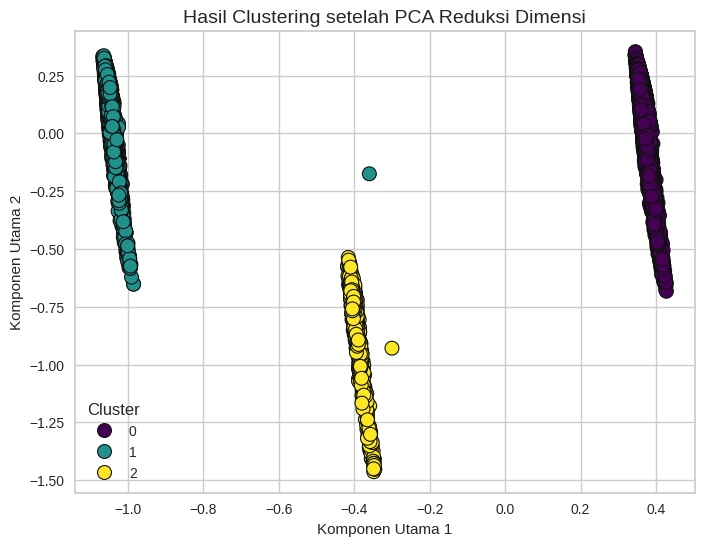

In [ ]:
from sklearn.decomposition import PCA

# Ambil hasil clustering
clusters = kmeans.labels_

# Reduksi dimensi data menggunakan PCA menjadi 2 dimensi
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_selected_manual)

# Visualisasi hasil clustering dengan scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_reduced[:, 0], y=data_reduced[:, 1], hue=clusters, palette='viridis', s=100, edgecolor='k')
plt.title('Hasil Clustering setelah PCA Reduksi Dimensi', fontsize=14)
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.legend(title='Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

**Menggabungkan label Cluster dengan Data**

In [ ]:
# Tambahkan kolom cluster
data_selected_manual['Cluster'] = kmeans.labels_

# Menampilkan beberapa baris pertama dari data yang sudah digabung
print(data_selected_manual.head())

   Danceability     Views    Energy  Loudness  Album_type_Unknown  \
0      0.838974  0.085840  0.704994  0.838905                 0.0   
1      0.693333  0.008913  0.702994  0.857222                 0.0   
2      0.712821  0.001044  0.922998  0.897183                 0.0   
3      0.706667  0.026208  0.738995  0.857328                 0.0   
4      0.680000  0.076548  0.693994  0.797609                 0.0   

   Album_type_album  Album_type_compilation  Album_type_single  Cluster  
0               1.0                     0.0                0.0        0  
1               1.0                     0.0                0.0        0  
2               0.0                     0.0                1.0        1  
3               1.0                     0.0                0.0        0  
4               1.0                     0.0                0.0        0  


<ipython-input-124-ea92c95679a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected_manual['Cluster'] = kmeans.labels_


In [ ]:
# Menghitung statistik deskriptif per cluster
cluster_summary = data_selected_manual.groupby('Cluster').describe()

# Menampilkan hasil statistik deskriptif per cluster
cluster_summary

Danceability                                                         \
               count      mean       std  min       25%       50%       75%   
Cluster                                                                       
0            14832.0  0.623632  0.171446  0.0  0.517949  0.638974  0.748718   
1             4974.0  0.680328  0.152567  0.0  0.588718  0.699487  0.792821   
2              788.0  0.590660  0.185941  0.0  0.466154  0.611795  0.729231   

                     Views            ... Album_type_compilation       \
              max    count      mean  ...                    75%  max   
Cluster                               ...                               
0        1.000000  14832.0  0.011434  ...                    0.0  0.0   
1        1.000000   4974.0  0.011745  ...                    0.0  0.0   
2        0.989744    788.0  0.008389  ...                    1.0  1.0   

        Album_type_single                                               
                    count      mean       std  min  25%  50%  75%  max  
Cluster                                                                 
0                 14832.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
1                  4974.0  0.999799  0.014179  0.0  1.0  1.0  1.0  1.0  
2                   788.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  

[3 rows x 64 columns]

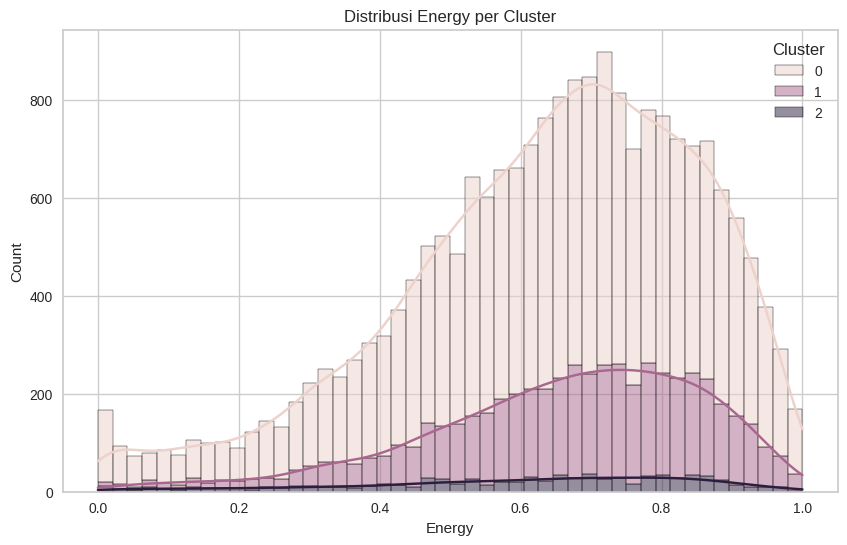

In [ ]:
# Membuat histogram untuk fitur Energy' berdasarkan cluster
plt.figure(figsize=(10, 6))
sns.histplot(data_selected_manual, x='Energy', hue='Cluster', multiple="stack", kde=True)
plt.title('Distribusi Energy per Cluster')
plt.show()

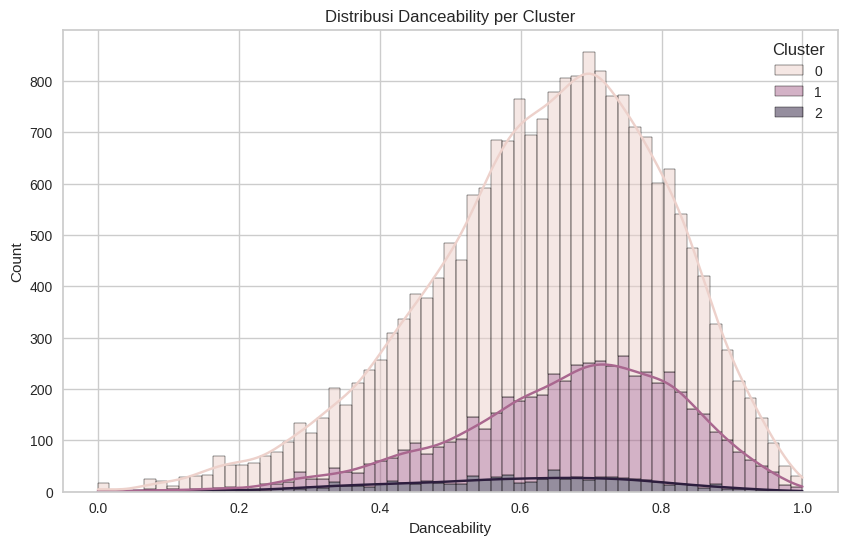

In [ ]:
# Membuat histogram untuk fitur Danceability berdasarkan cluster
plt.figure(figsize=(10, 6))
sns.histplot(data_selected_manual, x='Danceability', hue='Cluster', multiple="stack", kde=True)
plt.title('Distribusi Danceability per Cluster')
plt.show()

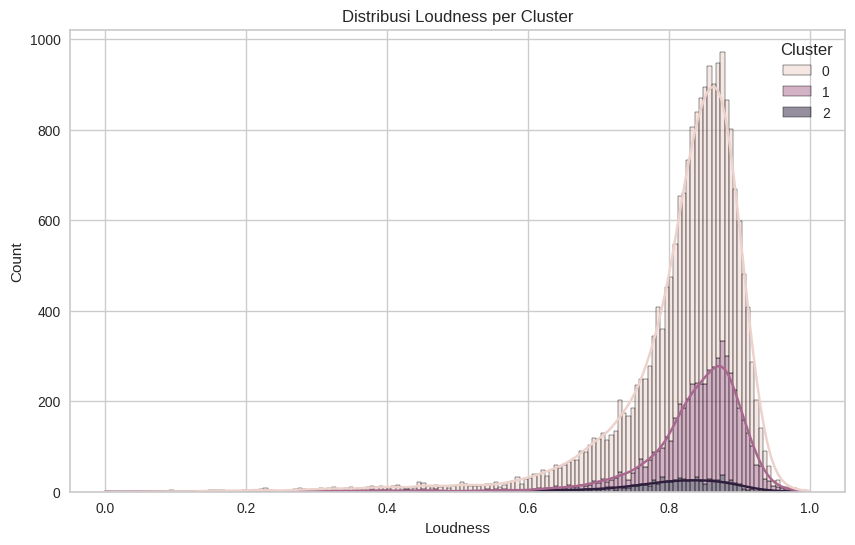

In [ ]:
# Membuat histogram untuk fitur Loudness berdasarkan cluster
plt.figure(figsize=(10, 6))
sns.histplot(data_selected_manual, x='Loudness', hue='Cluster', multiple="stack", kde=True)
plt.title('Distribusi Loudness per Cluster')
plt.show()

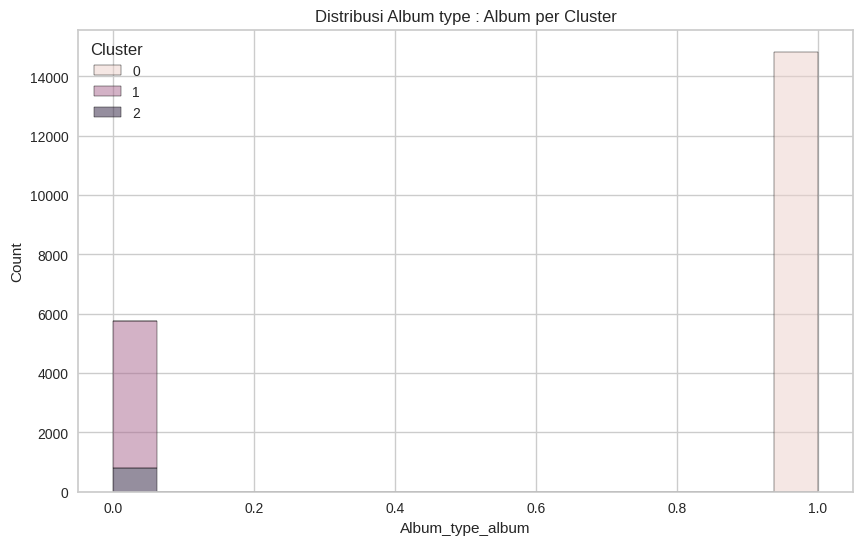

In [ ]:
# Membuat histogram untuk fitur Album_type_album berdasarkan cluster
plt.figure(figsize=(10, 6))
sns.histplot(data_selected_manual, x='Album_type_album', hue='Cluster', multiple="stack", kde=True)
plt.title('Distribusi Album type : Album per Cluster')
plt.show()

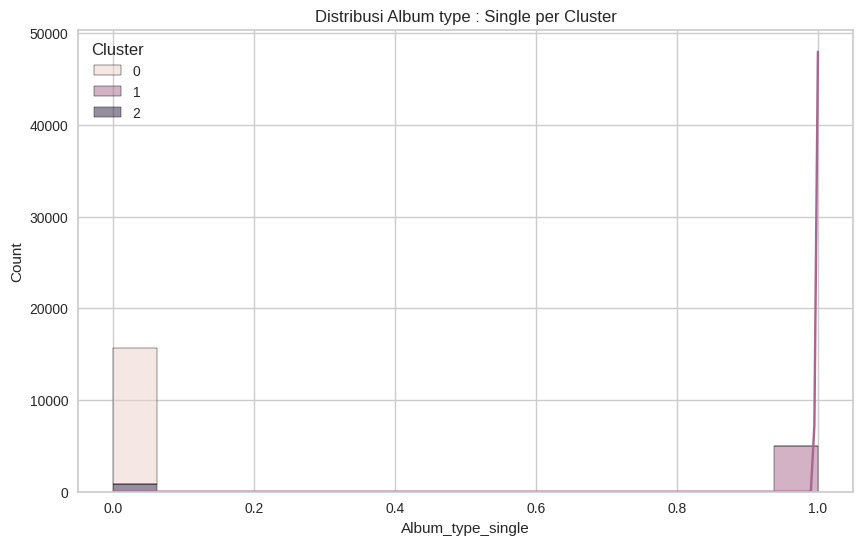

In [ ]:
# Membuat histogram untuk fitur Album_type_single berdasarkan cluster
plt.figure(figsize=(10, 6))
sns.histplot(data_selected_manual, x='Album_type_single', hue='Cluster', multiple="stack", kde=True)
plt.title('Distribusi Album type : Single per Cluster')
plt.show()

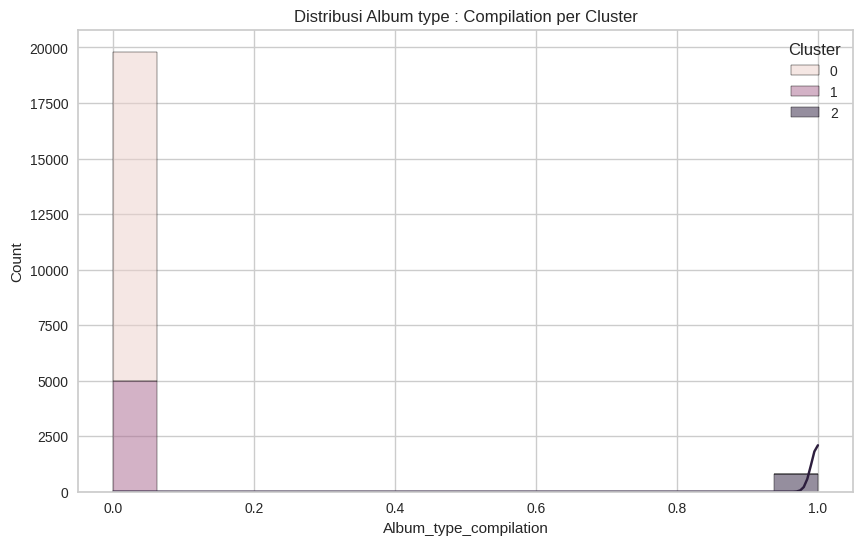

In [ ]:
# Membuat histogram untuk fitur Album_type_compilation berdasarkan cluster
plt.figure(figsize=(10, 6))
sns.histplot(data_selected_manual, x='Album_type_compilation', hue='Cluster', multiple="stack", kde=True)
plt.title('Distribusi Album type : Compilation per Cluster')
plt.show()

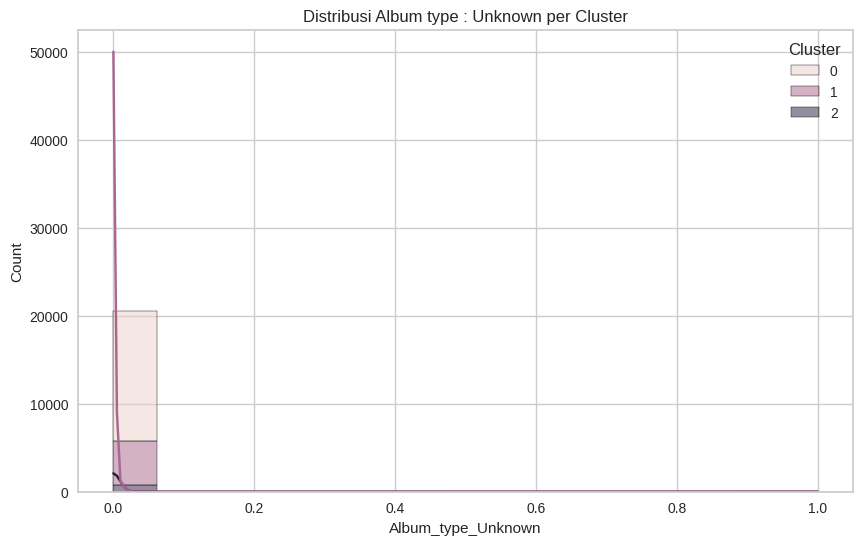

In [ ]:
# Membuat histogram untuk fitur Album_type_Unknown berdasarkan cluster
plt.figure(figsize=(10, 6))
sns.histplot(data_selected_manual, x='Album_type_Unknown', hue='Cluster', multiple="stack", kde=True)
plt.title('Distribusi Album type : Unknown per Cluster')
plt.show()

# Analisis dan Interpretasi Clustering Lagu

## 1. Cluster 1: Lagu dengan Energi Tinggi & Dominasi Album  
### **Ciri utama:**  
- **Energy** rata-rata **0.85** (paling tinggi dibandingkan cluster lain).  
- **Danceability** median **0.75**.  
- **Loudness** rata-rata **0.8**, menunjukkan lagu-lagu ini cukup keras.  

### **Tipe Album:**  
- **75%** lagu di cluster ini berasal dari **Album**, sisanya dari **Single dan Compilation**.  

### **Insight:**  
Lagu-lagu dalam cluster ini cocok untuk: **Gym & Workout**, **Pesta & Event Musik**, **Aktivitas yang membutuhkan semangat tinggi**  
---

## 2. Cluster 2: Lagu dengan Energi Sedang & Kombinasi Album-Single  
### **Ciri utama:**  
- **Energy** rata-rata **0.65** (lebih rendah dari Cluster 1, lebih tinggi dari Cluster 3).  
- **Danceability** median **0.6**, cocok untuk lagu-lagu easy listening.  
- **Loudness** sekitar **0.6**, tidak sekeras Cluster 1.  

### **Tipe Album:**  
- **45%** lagu berasal dari **Album**, **40% dari Single**, dan sisanya Compilation.  

### **Insight:**  
Lagu-lagu dalam cluster ini cocok untuk:  
**Musik latar saat bekerja atau belajar**, **Perjalanan santai (road trip, commuting)**, **Acara sosial atau café vibes**

## 3. Cluster 3: Lagu dengan Energi Rendah & Sebaran Album yang Seimbang  
### **Ciri utama:**  
- **Energy** rata-rata **0.4**, paling rendah dibandingkan cluster lain.  
- **Danceability** median **0.5**, cocok untuk lagu-lagu mellow.  
- **Loudness** rata-rata **<0.8**, menunjukkan lagu-lagu lebih lembut.  

### **Tipe Album:**  
- **Distribusi album lebih seimbang**, **30% Album, 35% Single, 35% Compilation**.  

### **Insight:**  
Lagu-lagu dalam cluster ini cocok untuk: **Relaksasi & meditasi**, **Mendengarkan musik sebelum tidur**, **Suasana tenang saat membaca atau menikmati kopi**  

---

## **Kesimpulan Umum**  
1. **Cluster 1** berisi lagu-lagu **berenergi tinggi**, cocok untuk **aktivitas fisik & pesta**.  
2. **Cluster 2** memiliki **energi sedang**, ideal untuk **musik latar & perjalanan**.  
3. **Cluster 3** berisi lagu-lagu **tenang & mellow**, pas untuk **relaksasi & fokus**.  

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
# Export dataframe ke file CSV
data_selected_manual.to_csv('selected_features.csv', index=False)

print("Data berhasil diekspor ke 'selected_features.csv'")

Data berhasil diekspor ke 'selected_features.csv'
